#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name: David Paipa
- Name: Francesco Cassol

Import modules and anything else you need

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by:
$$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`)
$$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [2]:
def function1(x):
    return (x**2)*np.exp(-x**2)

def abs_error(numerical_value, actual_value):
    return np.abs(actual_value-numerical_value)

Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

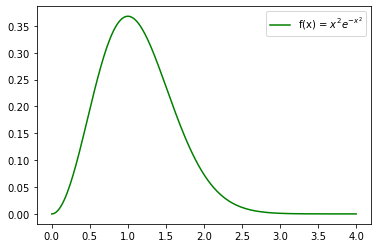

In [69]:
x_ = np.linspace(0,4,200)
y_ = function1(x_)


plt.figure()
plt.plot(x_,y_,c="g",label="f(x) = $x^2 e^{-x^2}$")
plt.legend()

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [4]:
def left_rule(f,interval,n_sub=100): 
    '''
    Parameters are: 
    - the function
    - the interval of evaluation
    - (optional) the number of sub-intervals
    '''
    Dx = (interval[1]-interval[0])/n_sub #Delta x
    point_a = interval[0] #point evaluated, staritng with the lower bound of the interval
    
    area = 0 # variable tu sum the areas
    
    for i in range(n_sub): #for every sub_interval
        area += f(point_a) # add f(a) to the area variable
        point_a = point_a + Dx #then change a to a+Dx
    
    #return the sum of the areas
    return area * Dx  



def right_rule(f,interval,n_sub=100): 
    '''
    Parameters are: 
    - the function
    - the interval of evaluation
    - (optional) the number of sub-intervals
    '''
    Dx = (interval[1]-interval[0])/n_sub #Delta x
    point_a = interval[0]+Dx #point evaluated, staritng with the lower bound of the interval plus DX
    
    area = 0 # variable tu sum the areas
    
    for i in range(n_sub): #for every sub_interval
        area += f(point_a) # add f(a) to the area variable
        point_a = point_a + Dx #then change a to a+Dx
    
    #return the sum of the areas
    return area * Dx  



def midpoint_rule(f,interval,n_sub=100): 
    '''
    Parameters are: 
    - the function
    - the interval of evaluation
    - (optional) the number of sub-intervals
    '''
    Dx = (interval[1]-interval[0])/n_sub #Delta x
    point_a = interval[0]+Dx/2 #point evaluated, staritng with the lower bound of the interval plus DX/2
    
    area = 0 # variable tu sum the areas
    
    for i in range(n_sub): #for every sub_interval
        area += f(point_a) # add f(a) to the area variable
        point_a = point_a + Dx #then change a to a+Dx
    
    #return the sum of the areas
    return area * Dx  



def trapezoid_rule(f,interval,n_sub=100): 
    '''
    Parameters are: 
    - the function
    - the interval of evaluation
    - (optional) the number of sub-intervals
    '''
    extra_factor = np.mean(interval) #extra factor added to the sum used in right_rule (used for computational efficiency)
    
    
    Dx = (interval[1]-interval[0])/n_sub #Delta x
    point_a = interval[0] #point evaluated, staritng with the lower bound of the interval plus DX
    
    area = 0 # variable tu sum the areas
    
    for i in range(n_sub): #for every sub_interval
        area += (f(point_a)+f(point_a+Dx))/2 # add ( f(a)+f(a+dx) )/2 to the area variable
        point_a = point_a + Dx #then change a to a+Dx
    
    #return the sum of the areas
    return (area) * Dx  


def simpsons_rule(f,interval,n_sub=100): 
    '''
    Parameters are: 
    - the function
    - the interval of evaluation
    - (optional) the number of sub-intervals
    '''
    extra_factor = np.mean(interval) #extra factor added to the sum used in right_rule (used for computational efficiency)
    
    
    Dx = (interval[1]-interval[0])/n_sub #Delta x
    point_a = interval[0] #point evaluated, staritng with the lower bound of the interval
    
    area = 0 # variable tu sum the areas
    
    for i in range(n_sub): #for every sub_interval
        area += f(point_a) + 4*f(point_a+Dx/2) +f(point_a+Dx) ## Simppson interpolation rule
        point_a = point_a + Dx #then change a to a+Dx
    
    #return the sum of the areas
    return (area) * (Dx/6)


For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [5]:
realval = 0.1894723458204922
print("for the interval [0,1] (MATHEMATICA value :{}) :".format(realval))
val = left_rule(function1,[0,1],100)
print("Left rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = right_rule(function1,[0,1],100)
print("Right rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = midpoint_rule(function1,[0,1],100)
print("Midpoint rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = trapezoid_rule(function1,[0,1],100)
print("Trapezoid rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = simpsons_rule(function1,[0,1],100)
print("Simpsons rule integration: {} ; error : {}".format(val,abs_error(val,realval)))

print("\n")

realval = 0.4429185594236305
print("for the interval [0,3] (MATHEMATICA value :{}) :".format(realval))
val = left_rule(function1,[0,3],100)
print("Left rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = right_rule(function1,[0,3],100)
print("Right rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = midpoint_rule(function1,[0,3],100)
print("Midpoint rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = trapezoid_rule(function1,[0,3],100)
print("Trapezoid rule integration: {} ; error : {}".format(val,abs_error(val,realval)))
val = simpsons_rule(function1,[0,3],100)
print("Simpsons rule integration: {} ; error : {}".format(val,abs_error(val,realval)))

for the interval [0,1] (MATHEMATICA value :0.1894723458204922) :
Left rule integration: 0.18763294859419616 ; error : 0.00183939722629603
Right rule integration: 0.19131174300591058 ; error : 0.0018393971854183955
Midpoint rule integration: 0.18947234583837677 ; error : 1.7884582703686647e-11
Trapezoid rule integration: 0.18947234580005337 ; error : 2.0438817305290513e-11
Simpsons rule integration: 0.18947234582560232 ; error : 5.1101345377446705e-12


for the interval [0,3] (MATHEMATICA value :0.4429185594236305) :
Left rule integration: 0.442901454969694 ; error : 1.7104453936489517e-05
Right rule integration: 0.4429347756167974 ; error : 1.6216193166884718e-05
Midpoint rule integration: 0.44291878143448477 ; error : 2.22010854256105e-07
Trapezoid rule integration: 0.4429181152932456 ; error : 4.441303849134215e-07
Simpsons rule integration: 0.4429185593874051 ; error : 3.6225411559343e-11


#### Comments:
 * Even for a relatively small number of subintervals the performance of numerical inegration is acceptable. Errors obtained are approximately 1% of the expected value (at most). 
 * Left and Right rules have similar error magnitudes between them. Trapezoid and midpoint rules have similar error magnitudes too. 
 * Left and Right rules have the largest absolute error, being these the ones with the worst performance.
 * Simpson's rule has the least absolute error in both cases. Even with 100 subintervals the errror is in the order of $10^{-11}$ which is pretty good.

We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

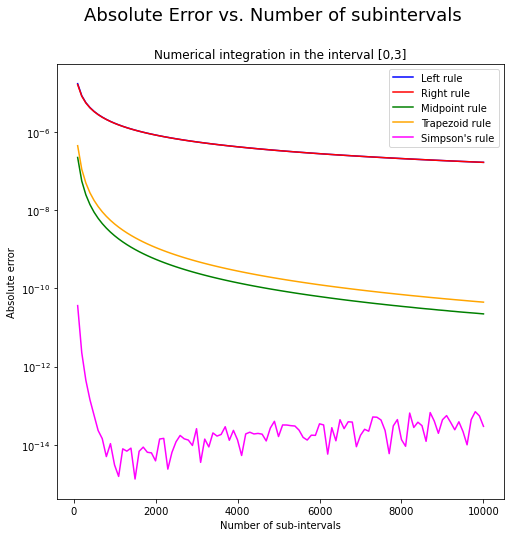

In [58]:
selected_interval = [0,3]
expected_a = 0.4429185594236305
subinterbvals_sweep = [100*n  for n in range(1,101)]

# creating a list of errors corresponding to each subinterval
error_left = [abs_error(left_rule(function1,selected_interval,n_si),expected_a) for n_si in subinterbvals_sweep]
error_right = [abs_error(right_rule(function1,selected_interval,n_si),expected_a) for n_si in subinterbvals_sweep]
error_midpoint = [abs_error(midpoint_rule(function1,selected_interval,n_si),expected_a) for n_si in subinterbvals_sweep]
error_trapezoid = [abs_error(trapezoid_rule(function1,selected_interval,n_si),expected_a) for n_si in subinterbvals_sweep]
error_simpson = [abs_error(simpsons_rule(function1,selected_interval,n_si),expected_a) for n_si in subinterbvals_sweep]


#plotting
plt.figure(figsize=(8,8))
plt.plot(subinterbvals_sweep,error_left,c="b",label="Left rule")
plt.plot(subinterbvals_sweep,error_right,c="r",label="Right rule")
plt.plot(subinterbvals_sweep,error_midpoint,c="g",label="Midpoint rule")
plt.plot(subinterbvals_sweep,error_trapezoid,c="orange",label="Trapezoid rule")
plt.plot(subinterbvals_sweep,error_simpson,c="magenta",label="Simpson's rule")

plt.xlabel("Number of sub-intervals")
plt.ylabel("Absolute error")
plt.yscale("log")
plt.title("Numerical integration in the interval [0,3]")
plt.suptitle("Absolute Error vs. Number of subintervals",fontsize=18)
plt.legend()

#### Comments:
The plot shows the similarity in the absolute error between the Left and Right rules (They overlap in the plot) and between the Trapezoid and Midpoint Rules. The Simpson's rule has the least absolute error of all 5 methods, even reaching machine precision limits in the lower boundary, which explains the hard arbitrary fluctuations in the error. The relation between the error ant thte number of subintervals seems to be linear ( taking into account that the y-axis of the plot is logarithmic)

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

**NOTE** 

Having :
    $$ \epsilon \propto \frac{1}{n^\alpha} $$
Implies that:
    $$ \log ( \epsilon )  = \log (c) - \alpha \log (n) $$
For an arbitrary  proportionality constant **c**.  

Alpha values for the different integration Methods:
Left rule: 1.0025790990759225
Right rule: 0.9973786663397358
Midpoint rule: 1.999868351217315
Trapezoid rule: 2.0000292931156136
Simpson's rule: ~ 4.0167323629466125


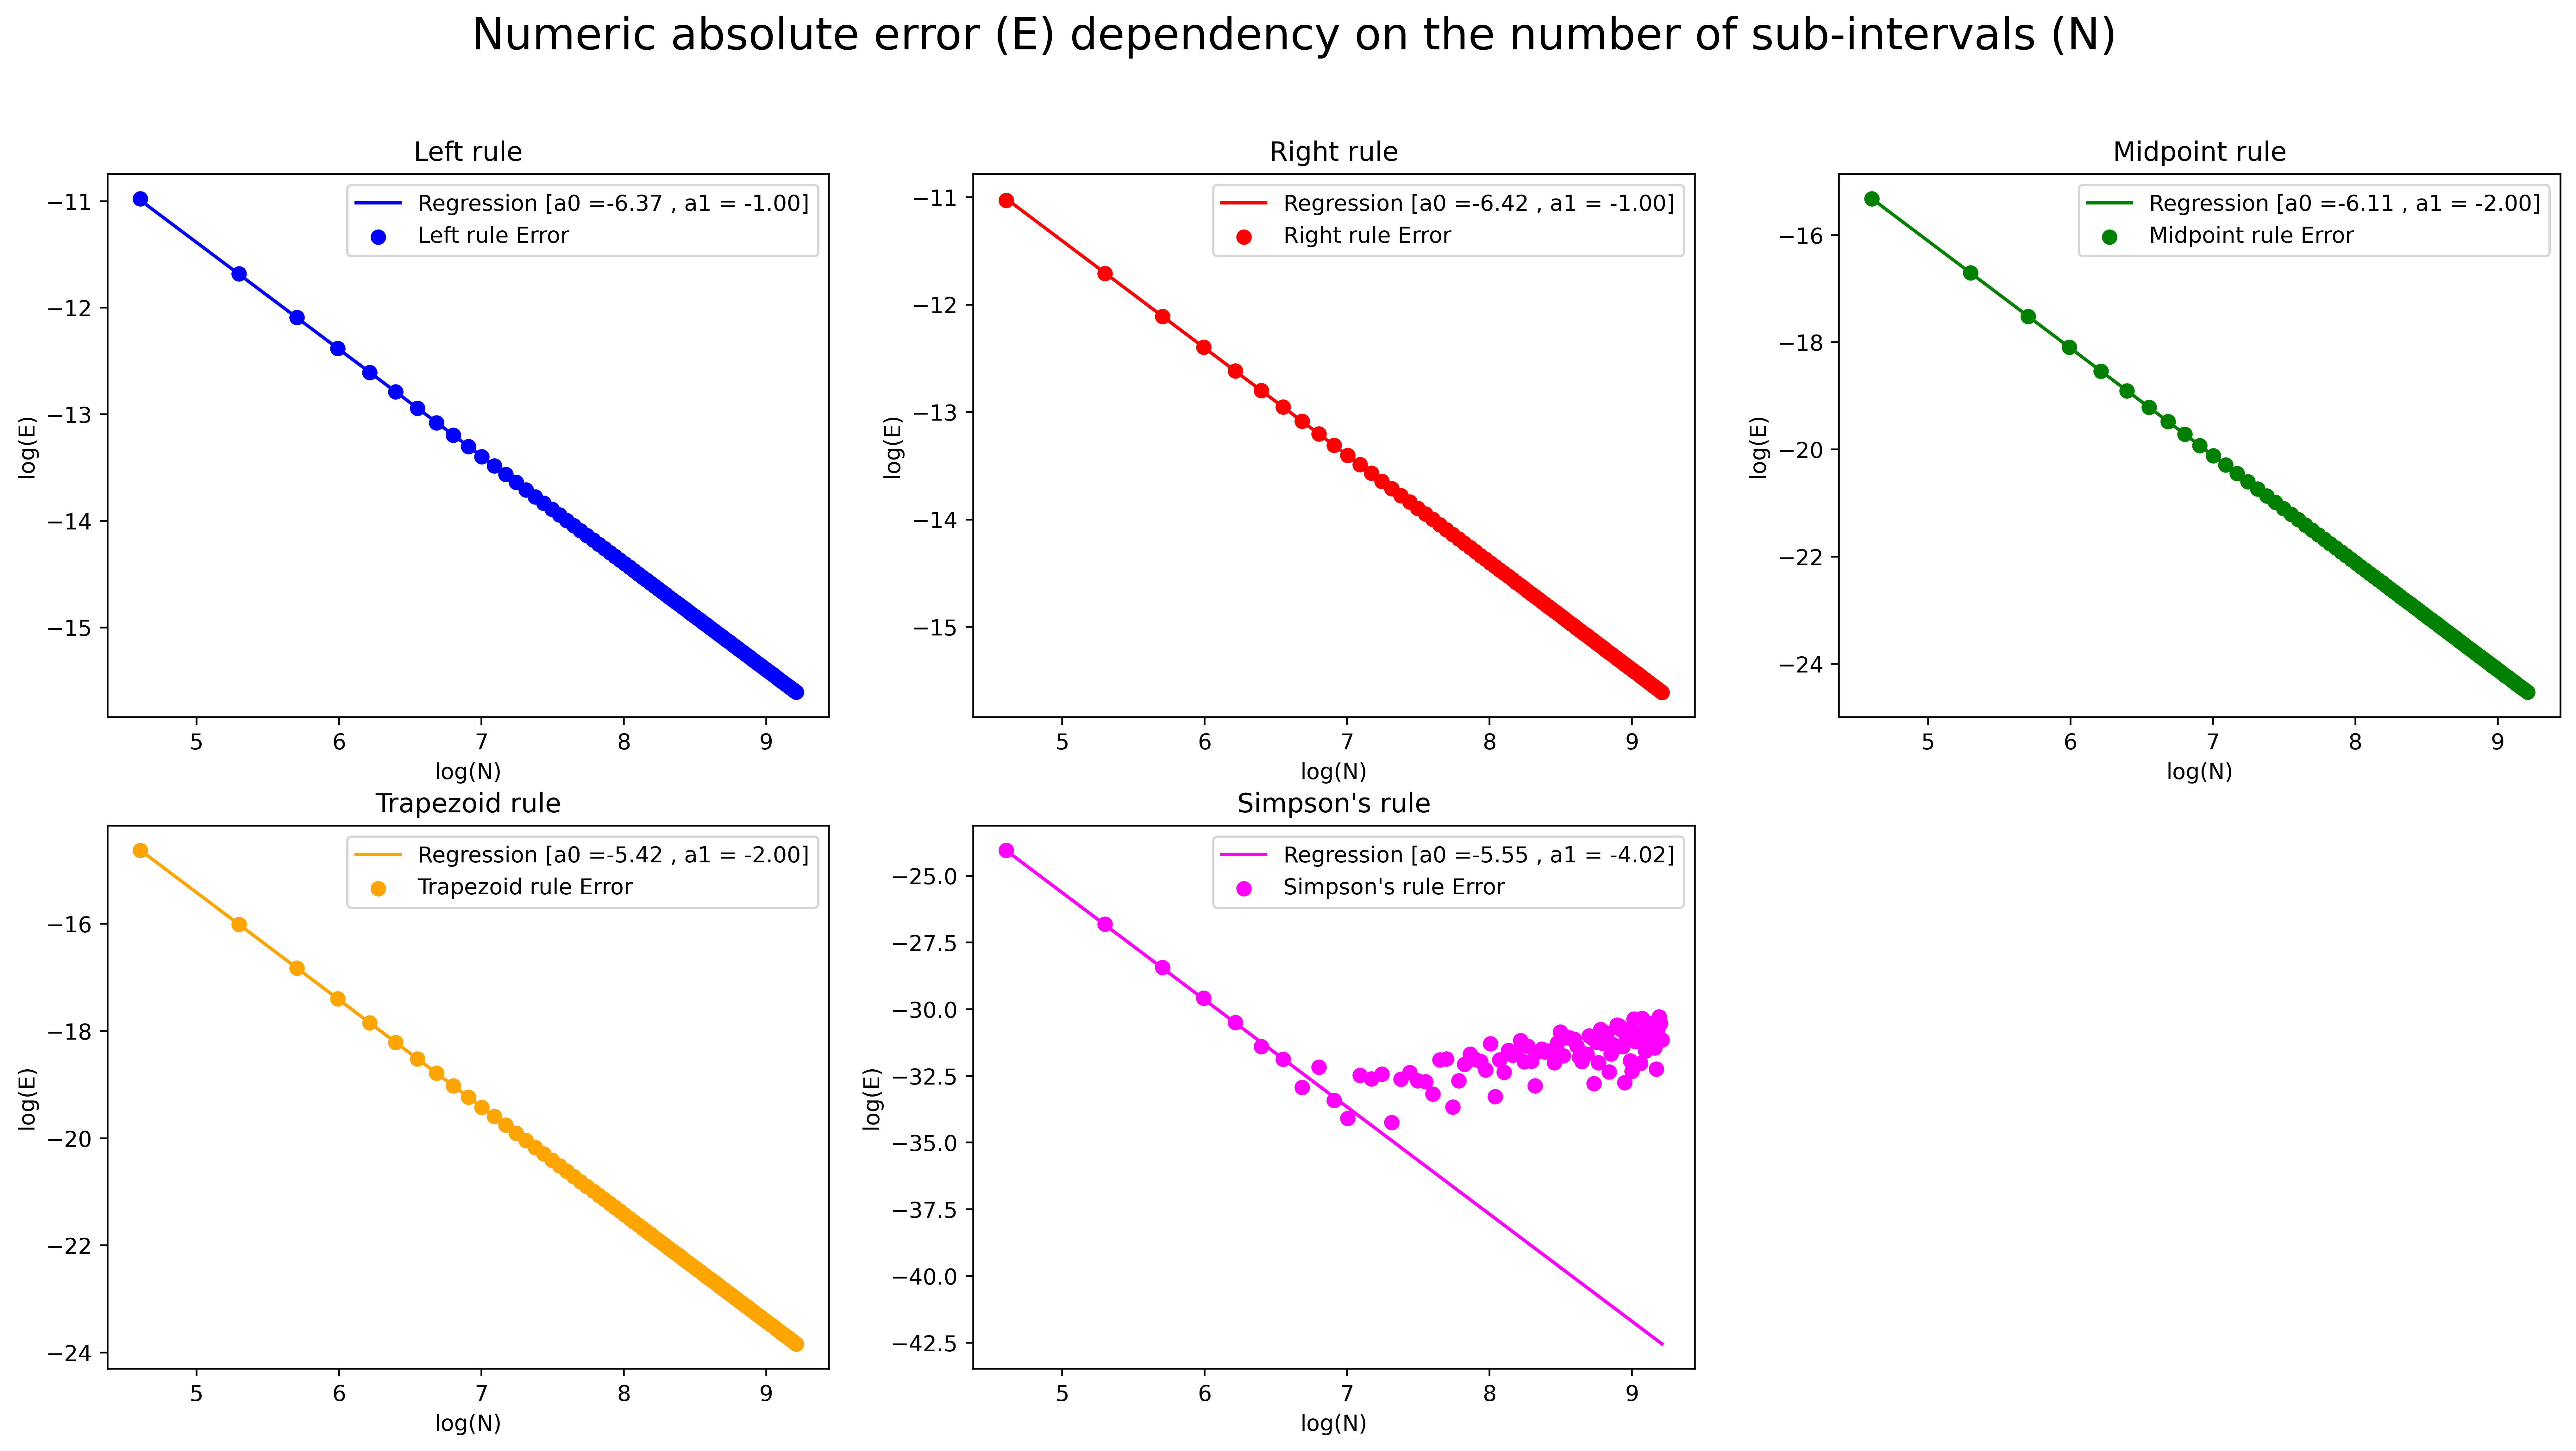

In [10]:
## function from my notebook in Lecture 2-3
def lin_reg(x_data, y_data):
    
    n = len(x_data) #total data
    x_mean = np.mean(x_data) #sum(x)/n
    y_mean = np.mean(y_data)#sum(y)/n
    
    s1 = np.sum([x_data[i]*y_data[i] for i in range(n)]) -n*x_mean*y_mean#S1 
    s2 = np.sum([x_data[i]*x_data[i] for i in range(n)]) -n*x_mean*x_mean#S2

    
    a1 = s1/s2 
    a0 = y_mean-a1*x_mean
    
    return (a0,a1)


# N log
log_sub = np.log(subinterbvals_sweep)

# Error log
logerr_left = np.log(error_left)
logerr_right = np.log(error_right)
logerr_midpoint = np.log(error_midpoint)
logerr_trapezoid = np.log(error_trapezoid)
logerr_simpson = np.log(error_simpson)

#getting the coefficients
(a0_left,a1_left) = lin_reg(log_sub,logerr_left)
(a0_right,a1_right) = lin_reg(log_sub,logerr_right)
(a0_midpoint,a1_midpoint) = lin_reg(log_sub,logerr_midpoint)
(a0_trapezoid,a1_trapezoid) = lin_reg(log_sub,logerr_trapezoid)
(a0_simpson,a1_simpson) = lin_reg(log_sub[:10],logerr_simpson[:10])

# linear regression modeling
left_model = a0_left + a1_left * log_sub
right_model = a0_right + a1_right * log_sub
midpoint_model = a0_midpoint + a1_midpoint * log_sub
trapezoid_model = a0_trapezoid + a1_trapezoid * log_sub
simpsons_model = a0_simpson + a1_simpson * log_sub


#plotting
plt.figure(figsize=(20,10),dpi=500)
plt.suptitle("Numeric absolute error (E) dependency on the number of sub-intervals (N)",fontsize=20)

plt.subplot(2,3,1)
plt.scatter(log_sub,logerr_left,c="b",label="Left rule Error")
plt.plot(log_sub,left_model,c="b",label="Regression [a0 ={:.2f} , a1 = {:.2f}]".format(a0_left,a1_left))
plt.legend()
plt.title("Left rule")
plt.xlabel("log(N)")
plt.ylabel("log(E)")

plt.subplot(2,3,2)
plt.scatter(log_sub,logerr_right,c="r",label="Right rule Error")
plt.plot(log_sub,right_model,c="r",label="Regression [a0 ={:.2f} , a1 = {:.2f}]".format(a0_right,a1_right))
plt.legend()
plt.title("Right rule")
plt.xlabel("log(N)")
plt.ylabel("log(E)")

plt.subplot(2,3,3)
plt.scatter(log_sub,logerr_midpoint,c="g",label="Midpoint rule Error")
plt.plot(log_sub,midpoint_model,c="g",label="Regression [a0 ={:.2f} , a1 = {:.2f}]".format(a0_midpoint,a1_midpoint))
plt.legend()
plt.title("Midpoint rule")
plt.xlabel("log(N)")
plt.ylabel("log(E)")

plt.subplot(2,3,4)
plt.scatter(log_sub,logerr_trapezoid,c="orange",label="Trapezoid rule Error")
plt.plot(log_sub,trapezoid_model,c="orange",label="Regression [a0 ={:.2f} , a1 = {:.2f}]".format(a0_trapezoid,a1_trapezoid))
plt.legend()
plt.title("Trapezoid rule")
plt.xlabel("log(N)")
plt.ylabel("log(E)")

plt.subplot(2,3,5)
plt.scatter(log_sub,logerr_simpson,c="magenta",label="Simpson's rule Error")
plt.plot(log_sub,simpsons_model,c="magenta",label="Regression [a0 ={:.2f} , a1 = {:.2f}]".format(a0_simpson,a1_simpson))
plt.legend()
plt.title("Simpson's rule")
plt.xlabel("log(N)")
plt.ylabel("log(E)")


#Printng alpha values
print("Alpha values for the different integration Methods:")
print("Left rule: {}".format(-a1_left))
print("Right rule: {}".format(-a1_right))
print("Midpoint rule: {}".format(-a1_midpoint))
print("Trapezoid rule: {}".format(-a1_trapezoid))
print("Simpson's rule: ~ {}".format(-a1_simpson))

#### Comments
* The magnitude of the error for the Left and Right integration methods is proportional to $\frac{1}{N}$, meanwhile the dependency on the Trapezoid and Midpoint Methods is on the factor $\frac{1}{N^{2}}$
* The simpson's method reached the numeric precision, and the resulting fluctuation makes it hard to find a function than fits the whole set of points given by the error. We estimated that near n = 800 this fluctuations start, so we fit only some of the first points (while they preserve linear behavior) to obtain an error dependency of $\frac{1}{N^{4}}$

## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


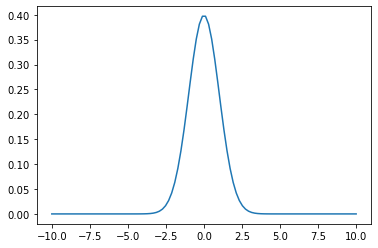

In [11]:
def function2(x): # defining the new function
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*(x**2)) 

# plotting the interval[-10,10]
plot_interval = np.linspace(-10,10,100)
plot_y = function2(plot_interval)

#plot
plt.figure()
plt.plot(plot_interval,plot_y)

**NOTE:**

$$ \int_{-\infty}^1 \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx   = \frac{1}{\sqrt{2 \pi}} \left( \int_{-\infty}^{-1}  \exp{(-x^2/2)} \; dx   +  \int_{-1}^1 \exp{(-x^2/2)} \;dx \right) $$


for the remaining improper integral we use the substitution $$x = \frac{1}{t} \;  , \; dx = -\frac{1}{t^2} $$ :


$$\int_{-\infty}^{-1}  \exp{(-x^2/2)} \; dx = \int_{-1}^{0} \frac{ \exp{(-1/2t^2)} }{ t^2 }  \; dt$$


In [12]:
def function2a(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-1/(2*x**2))/x**2 #define the auxiliar function including the factor 1/sqrt(2pi)


#first integral (function 2 evaluated in th interval [-1,1])
int1 = simpsons_rule(function2,[-1,1],1000)

#second integral (fucntion 2a evaluated in the integral [-1,0]) 
int2 = simpsons_rule(function2a,[-1,0],1000)


answer = int1 + int2

print("Integral using simpsons rule: {}".format(answer) )
print("Integral using Wolfram Alpha: 0.841345")

Integral using simpsons rule: 0.8413447460685481
Integral using Wolfram Alpha: 0.841345


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x) and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

In [63]:
def montecarlo(f,a,b,n):
    points = np.random.uniform(a,b,n)
    mean  = np.mean([f(x) for x in points])
    return (b-a)*mean

def function3(x):
    return x**2

Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

In [64]:
expected_result = 16/3

#calculating integral with  montecarlo
mc_result = montecarlo(function3,-2,2,5000)

#calculating integral with  simpsons method
s_result = simpsons_rule(function3,[-2,2],1000)


print("Absolute error for Montecarlo method (5000 samples): {}".format(abs_error(expected_result,mc_result)))
print("Absolute error for Simpson's method (1000 subintervals): {}".format(abs_error(expected_result,s_result)))

Absolute error for Montecarlo method (5000 samples): 0.02383301328718801
Absolute error for Simpson's method (1000 subintervals): 2.6645352591003757e-15


Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 

In [65]:
n_sweep = np.linspace(1,4,250) #power of ten ranging  form 1 to 4
n_sweep = np.power(10,n_sweep) # 10 to the power of ...
n_sweep = list(map(int,n_sweep)) # approximating to  integer values of n

N_it = 100 #number of iterations

mc_mean_ans = [] # where the mean montecarlo results will be plotted
for n in n_sweep: #for each n value
    acc_sum = 0 
    for i in range(N_it): # for each iteration
        acc_sum += montecarlo(function3,-2,2,n) 
    mc_mean_ans.append(acc_sum/N_it) 

mc_abs_errors = [abs_error(expected_result,x) for x in mc_mean_ans] # for each mean , calculate the absolute error    

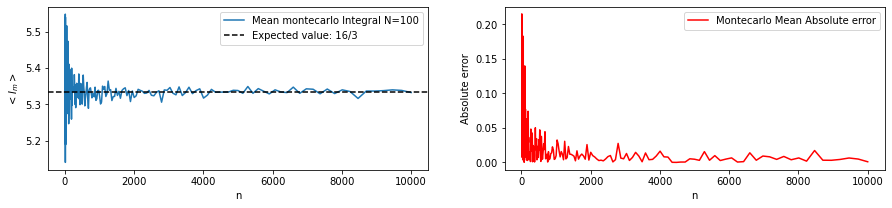

In [66]:
#plotting
plt.figure(figsize=(15,3))

#integral convergence
plt.subplot(1,2,1)
plt.plot(n_sweep,mc_mean_ans,label="Mean montecarlo Integral N=100")
plt.xlabel("n")
plt.axhline(16/3,c="k",linestyle="--",label="Expected value: 16/3")
plt.ylabel(r"$<I_m>$")
plt.legend()

#Error convergence
plt.subplot(1,2,2)
plt.plot(n_sweep,mc_abs_errors,c="r",label="Montecarlo Mean Absolute error")
plt.xlabel("n")
plt.ylabel("Absolute error")
plt.legend()

The montecarlo error is proportional to a factor of N^(-0.47)


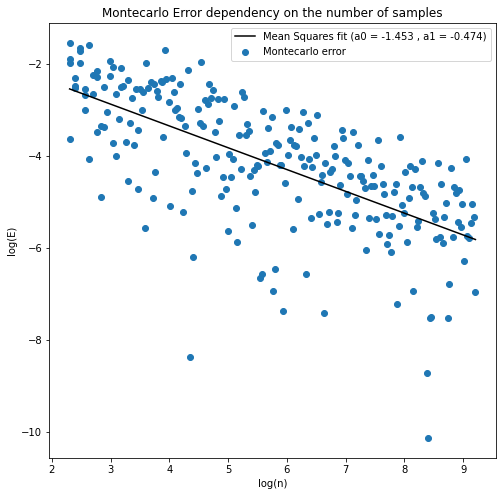

In [67]:
mc_log_err = np.log(mc_abs_errors) # log of the error
mc_log_n = np.log(n_sweep) # log of n

(mce_a0,mce_a1) = lin_reg(mc_log_n,mc_log_err) #linear regrsssion to extract the coefficients

mc_error_model = mce_a0 + mce_a1*mc_log_n # error modeling using the regression coefficients

#plotting

plt.figure(figsize=(8,8))
plt.title("Montecarlo Error dependency on the number of samples")
plt.scatter(mc_log_n,mc_log_err,label="Montecarlo error")
plt.plot(mc_log_n, mc_error_model,c="k",label="Mean Squares fit (a0 = {:.3f} , a1 = {:.3f})".format(mce_a0,mce_a1))
plt.xlabel("log(n)")
plt.ylabel("log(E)")
plt.legend()


print("The montecarlo error is proportional to a factor of N^({:.2f})".format(mce_a1))

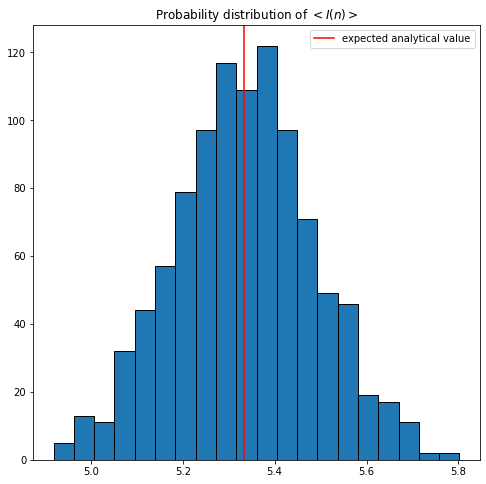

In [68]:
N_it = 1000
n= 1000

datapoints = [] #storing the results of each iteration
for N in range(N_it):
    datapoints.append(montecarlo(function3,-2,2,n))
    
    
plt.figure(figsize=(8,8))
plt.title("Probability distribution of $<I(n)>$")
plt.hist(datapoints,bins=20,ec="k") #drawing a line on the expected value
plt.axvline(16/3,c="r",label="expected analytical value")
plt.legend()

#### Comments:

* As expected, the dependency of the Montecarlo Error over **n** is close to $$\frac{1}{n^{1/2}}$$.
* When calculating multiple times the integral using the random sampling of montecarlo method we can observe a normal probability distribution around the real value. We can conclude that montecarlo is a robust method to numerically approximate the integral value. The variance in the different outcomes around the real value is a consequence of the random sampling.
* Monetecarlo performance can be improved by averaging several outcomes of the same method. The Probability distribution suggests that this average is a more accurate answer than just taking a unique arbitrary outcome.